<a href="https://colab.research.google.com/github/space-owner/Deep-Learning/blob/main/multi_class_classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Multi-Class Classification with Keras***
This post was written for study purpose.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
seed = 47

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()
print(" >>> train shape =", train_image.shape, train_label.shape)
print(" >>> test  shape =", test_image.shape, test_label.shape)

4431872/4422102 [==============================] - 0s 0us/step
 >>> train shape = (60000, 28, 28) (60000,)
 >>> test  shape = (10000, 28, 28) (10000,)


In [3]:
data = []
for image in train_image:
    image = cv.cvtColor(
        image, cv.COLOR_BGR2RGB
    )
    data.append(image)
train_data = np.array(data)

data = []
for image in test_image:
    image = cv.cvtColor(
        image, cv.COLOR_BGR2RGB
    )
    data.append(image)
test_data = np.array(data)

del train_image, test_image

print(" >>> train shape =", train_data.shape, train_label.shape)
print(" >>> test  shape =", test_data.shape, test_label.shape)

 >>> train shape = (60000, 28, 28, 3) (60000,)
 >>> test  shape = (10000, 28, 28, 3) (10000,)


 >>> image shape = (28, 28, 3)
 >>> image class =  2
 >>> class  name = Pullover


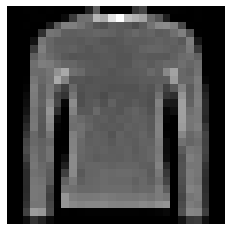

In [4]:
class_name = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

sample_number = np.random.randint(seed)

def show_image(image: list):
    plt.imshow(image)
    plt.axis('off')
    return print(" >>> image shape =", image.shape)

show_image(train_data[sample_number])

print(" >>> image class = ", train_label[sample_number])
print(" >>> class  name =", class_name[train_label[sample_number]])

In [5]:
train_data = train_data / 255.0
test_data = test_data / 255.0
print(" >>> image nomalization a completed.")

 >>> image nomalization a completed.


In [9]:
train_data.shape[1], train_data.shape[0], train_data.shape[2]

(28, 60000, 28)

 >>> building the custom vgg...
 >>> build a completed.


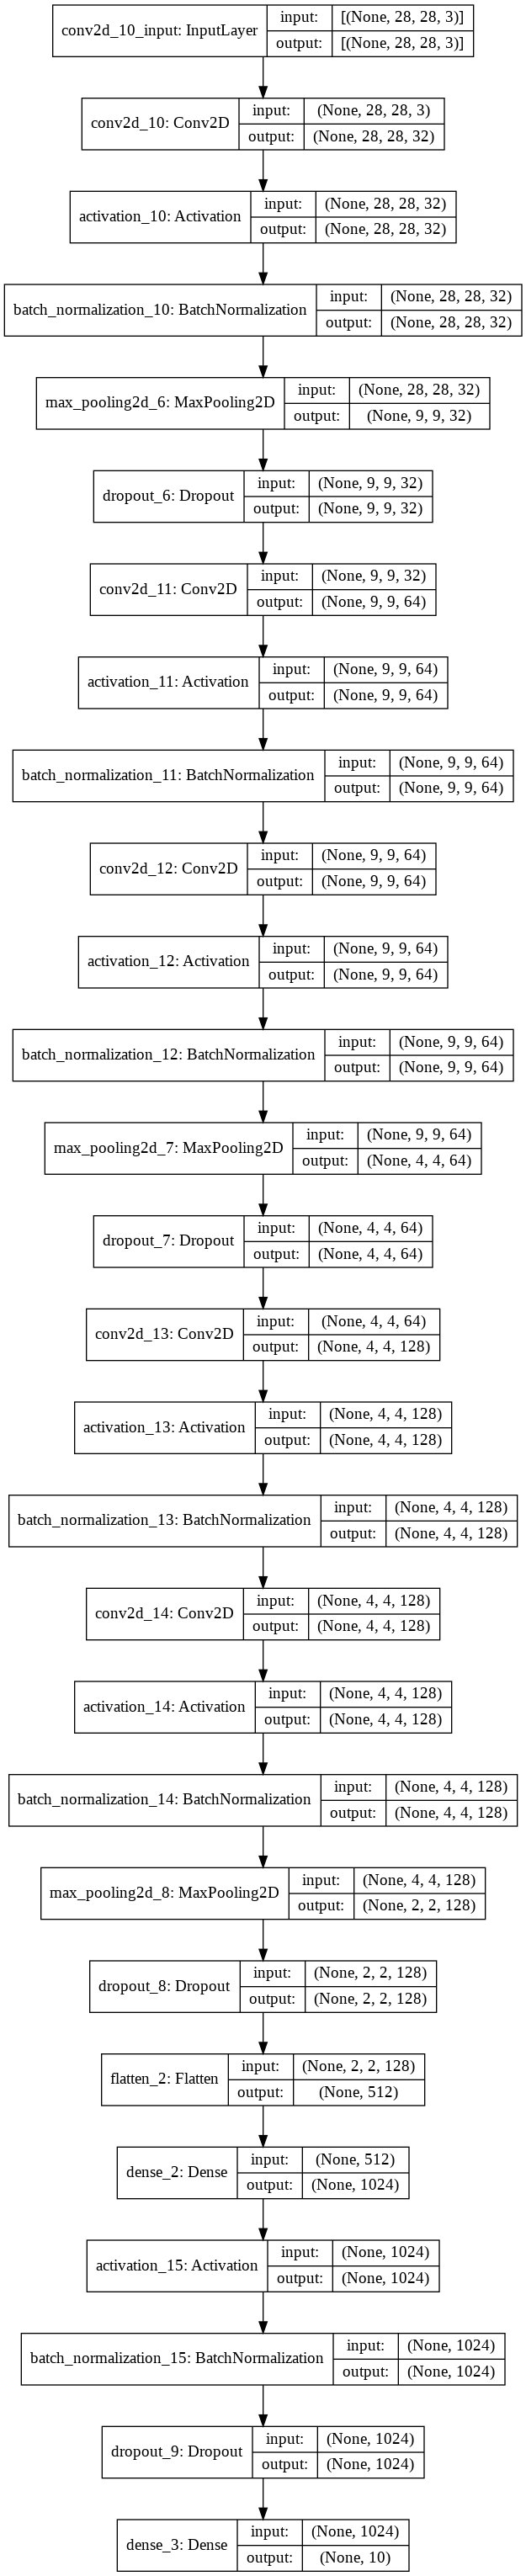

In [10]:
input_shape=(28, 28, 3)
classes_num = len(class_name)

print(" >>> building the custom vgg...")

model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape)
)
model.add(
    tf.keras.layers.Activation('relu')
)
model.add(
    tf.keras.layers.BatchNormalization(axis=-1)
)
model.add(
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3))
)
model.add(
    tf.keras.layers.Dropout(0.25)
)

model.add(
    tf.keras.layers.Conv2D(64, (3, 3), padding='same')
)
model.add(
    tf.keras.layers.Activation('relu')
)
model.add(
    tf.keras.layers.BatchNormalization(axis=-1)
)
model.add(
    tf.keras.layers.Conv2D(64, (3, 3), padding='same')
)
model.add(
    tf.keras.layers.Activation('relu')
)
model.add(
    tf.keras.layers.BatchNormalization(axis=-1)
)
model.add(
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
)
model.add(
    tf.keras.layers.Dropout(0.25)
)

model.add(
    tf.keras.layers.Conv2D(128, (3, 3), padding='same')
)
model.add(
    tf.keras.layers.Activation('relu')
)
model.add(
    tf.keras.layers.BatchNormalization(axis=-1)
)
model.add(
    tf.keras.layers.Conv2D(128, (3, 3), padding='same')
)
model.add(
    tf.keras.layers.Activation('relu')
)
model.add(
    tf.keras.layers.BatchNormalization(axis=-1)
)
model.add(
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
)
model.add(
    tf.keras.layers.Dropout(0.25)
)

model.add(
    tf.keras.layers.Flatten()
)
model.add(
    tf.keras.layers.Dense(1024)
)
model.add(
    tf.keras.layers.Activation('relu')
)
model.add(
    tf.keras.layers.BatchNormalization()
)
model.add(
    tf.keras.layers.Dropout(0.5)
)

model.add(
    tf.keras.layers.Dense(classes_num)
)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print(" >>> build a completed.")

keras.utils.vis_utils.plot_model(
    model, show_shapes=True, show_layer_names=True
)

In [11]:
batch_size = 32
epochs = 50

history = model.fit(
    train_data, train_label, batch_size=batch_size,
    validation_data=(test_data, test_label),
    epochs=epochs, verbose=1
)

Epoch 1/50
1875/1875 [==============================] - 63s 16ms/step - loss: 0.5966 - accuracy: 0.7983 - val_loss: 0.4622 - val_accuracy: 0.8350
Epoch 2/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3803 - accuracy: 0.8637 - val_loss: 0.3068 - val_accuracy: 0.8886
Epoch 3/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3365 - accuracy: 0.8793 - val_loss: 0.2903 - val_accuracy: 0.8971
Epoch 4/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3125 - accuracy: 0.8894 - val_loss: 0.2943 - val_accuracy: 0.8923
Epoch 5/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2888 - accuracy: 0.8967 - val_loss: 0.2906 - val_accuracy: 0.8961
Epoch 6/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2777 - accuracy: 0.9010 - val_loss: 0.2545 - val_accuracy: 0.9098
Epoch 7/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2634 - accuracy: 0.9047 - val_loss: 0.2543 -

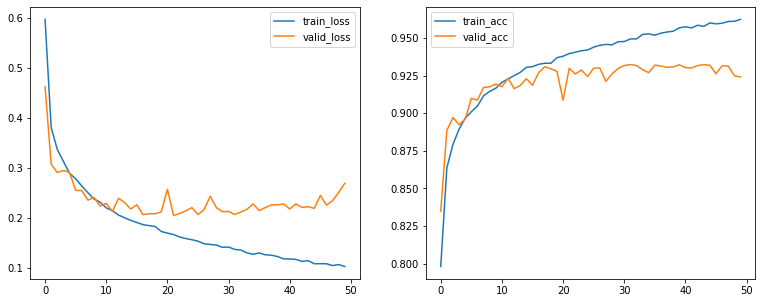

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(13, 5)

ax1.plot(np.arange(0, epochs), history.history['loss'], label="train_loss")
ax1.plot(np.arange(0, epochs), history.history['val_loss'], label="valid_loss")
ax1.legend(loc="upper right")

ax2.plot(np.arange(0, epochs), history.history['accuracy'], label="train_acc")
ax2.plot(np.arange(0, epochs), history.history['val_accuracy'], label="valid_acc")
ax2.legend(loc="upper left")
plt.show()

In [14]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

pred_data = probability_model.predict(test_data)

print(" >>> predict shape = ", pred_data.shape)

 >>> predict shape =  (10000, 10)


 >>> image shape = (28, 28, 3)
>>> predict class =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 >>> class name = Pullover (2)


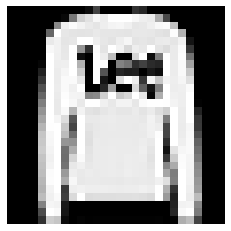

In [15]:
random_number = np.random.randint(seed)

sample_image = test_data[random_number]
show_image(sample_image)
print(
    ">>> predict class = ", pred_data[random_number].round(2)
)
print(" >>> class name = {} ({})".format( 
    class_name[np.argmax(pred_data[random_number])],
    np.argmax(pred_data[random_number]))
)